## Logistic Regression using sklearn

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df = pd.read_csv('churn_logistic.csv')

In [97]:
df.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Intl Plan,VMail Plan,Day Calls,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone,Churn
0,128,25,265.1,197.4,244.7,10.0,1,0,1,110,...,99,16.78,91,11.01,3,2.70,KS,415,382-4657,0
1,107,26,161.6,195.5,254.4,13.7,1,0,1,123,...,103,16.62,103,11.45,3,3.70,OH,415,371-7191,0
2,137,0,243.4,121.2,162.6,12.2,0,0,0,114,...,110,10.30,104,7.32,5,3.29,NJ,415,358-1921,0
3,84,0,299.4,61.9,196.9,6.6,2,1,0,71,...,88,5.26,89,8.86,7,1.78,OH,408,375-9999,0
4,75,0,166.7,148.3,186.9,10.1,3,1,0,113,...,122,12.61,121,8.41,3,2.73,OK,415,330-6626,0


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  5700 non-null   int64  
 1   VMail Message   5700 non-null   int64  
 2   Day Mins        5700 non-null   float64
 3   Eve Mins        5700 non-null   float64
 4   Night Mins      5700 non-null   float64
 5   Intl Mins       5700 non-null   float64
 6   CustServ Calls  5700 non-null   int64  
 7   Intl Plan       5700 non-null   int64  
 8   VMail Plan      5700 non-null   int64  
 9   Day Calls       5700 non-null   int64  
 10  Day Charge      5700 non-null   float64
 11  Eve Calls       5700 non-null   int64  
 12  Eve Charge      5700 non-null   float64
 13  Night Calls     5700 non-null   int64  
 14  Night Charge    5700 non-null   float64
 15  Intl Calls      5700 non-null   int64  
 16  Intl Charge     5700 non-null   float64
 17  State           5700 non-null   o

In [99]:
df.columns

Index(['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins',
       'Intl Mins', 'CustServ Calls', 'Intl Plan', 'VMail Plan', 'Day Calls',
       'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge',
       'Intl Calls', 'Intl Charge', 'State', 'Area Code', 'Phone', 'Churn'],
      dtype='object')

In [100]:
X = df[['Account Length', 'Day Mins', 'Eve Mins', 'Night Mins', 'CustServ Calls']]
X

,Account Length,Day Mins,Eve Mins,Night Mins,CustServ Calls
0,128,265.1,197.4,244.7,1
1,107,161.6,195.5,254.4,1
2,137,243.4,121.2,162.6,0
3,84,299.4,61.9,196.9,2
4,75,166.7,148.3,186.9,3
...,...,...,...,...,...
5695,224,171.5,160.0,212.4,1
5696,131,131.6,179.3,251.2,1
5697,132,291.2,234.2,191.7,1
5698,100,113.3,197.9,284.5,4


In [101]:
y = df['Churn']
y

0       0
1       0
2       0
3       0
4       0
       ..
5695    1
5696    1
5697    1
5698    1
5699    1
Name: Churn, Length: 5700, dtype: int64

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X_train_A, X_test, y_train_A, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_train_A, y_train_A, test_size=0.2, random_state=0)

In [104]:
X_train.shape, y_train.shape

((3648, 5), (3648,))

In [105]:
X_val.shape, y_val.shape

((912, 5), (912,))

In [106]:
X_test.shape, y_test.shape

((1140, 5), (1140,))

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
scaler = StandardScaler()

In [109]:
X_train_scaled = scaler.fit_transform(X_train)

In [110]:
X_train_scaled

array([[-0.79646682, -0.35173441, -0.99183796,  0.52553628, -0.52806104],
       [ 2.38917689, -2.06260257,  0.27443837, -0.38100231, -1.14687462],
       [ 0.19745402, -0.4044995 ,  0.29391955, -0.11066681, -0.52806104],
       ...,
       [-0.18482322, -1.64208077,  2.60633494, -0.60662067, -0.52806104],
       [ 0.50327582, -0.34853653,  2.81283538,  1.91583315, -1.14687462],
       [ 0.29939462, -1.11922667, -1.44964555, -0.67572899,  1.94719328]])

In [111]:
X_val_scaled = scaler.transform(X_val)

In [112]:
X_val_scaled

array([[-0.33773412,  1.16086491,  0.76536397, -0.85866279, -0.52806104],
       [ 0.12099857, -0.93534832, -0.35675167, -0.42368687, -0.52806104],
       [-0.51613017,  0.09916729,  0.09326345, -0.19197072,  0.09075254],
       ...,
       [-0.77098167,  0.7323484 ,  1.41019083, -0.19603592, -1.14687462],
       [ 0.80909761,  0.383779  ,  0.31340072, -0.21839449,  0.09075254],
       [ 0.80909761,  0.99937175,  0.89783595, -0.50092558, -1.14687462]])

In [113]:
X_test_scaled = scaler.transform(X_test)

In [114]:
X_test_scaled

array([[ 0.14648372,  0.03680854, -0.38597344, -0.49686039,  0.09075254],
       [-0.54161532, -1.45660348,  1.11212887, -1.32209507, -1.14687462],
       [ 0.60521642, -0.15826241, -1.29184804, -0.63304444,  0.09075254],
       ...,
       [-1.9687837 , -0.69071016, -1.46328237,  0.72879606,  0.09075254],
       [ 0.96200851, -1.53495164, -0.53013413, -0.41962167,  0.09075254],
       [ 1.5226818 ,  1.69011478,  0.62315139,  0.76741542, -0.52806104]])

In [115]:
from sklearn.linear_model import LogisticRegression

In [116]:
model = LogisticRegression()

In [117]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [118]:
y_train_predictions = model.predict(X_train_scaled)

In [119]:
y_val_predictions = model.predict(X_val_scaled)

In [120]:
y_test_predictions = model.predict(X_test_scaled)

In [121]:
print("Training Accuracy:",model.score(X_train_scaled, y_train))

Training Accuracy: 0.7075109649122807


In [122]:
print("Validation Accuracy:",model.score(X_val_scaled, y_val))

Validation Accuracy: 0.7094298245614035


In [123]:
print("Test Accuracy:",model.score(X_test_scaled, y_test))

Test Accuracy: 0.706140350877193


Custom Define Accuracy Function

In [124]:
def Accuracy(y1, y2):
    acc = np.sum(y1==y2)/len(y2)
    return acc

In [125]:
Accuracy(y_train, y_train_predictions)

0.7075109649122807

In [126]:
Accuracy(y_val, y_val_predictions)

0.7094298245614035

In [127]:
Accuracy(y_test, y_test_predictions)

0.706140350877193

Hyperparameter Tuning

In [128]:
from sklearn.pipeline import make_pipeline

In [129]:
train_scores = []
val_scores = []

scaler = StandardScaler()

for la in np.arange(0.01, 5000.0, 100):
    
    scaled_lr_model = make_pipeline(scaler, LogisticRegression(C=1/la))
    scaled_lr_model.fit(X_train, y_train)
    
    train_score = Accuracy(y_train, scaled_lr_model.predict(X_train))
    val_score = Accuracy(y_val, scaled_lr_model.predict(X_val))
    
    train_scores.append(train_score)
    val_scores.append(val_score)

In [130]:
train_scores[:5]

[0.7075109649122807,
 0.7053179824561403,
 0.7050438596491229,
 0.7108004385964912,
 0.7116228070175439]

In [131]:
val_scores[:5]

[0.7094298245614035,
 0.7105263157894737,
 0.7094298245614035,
 0.7149122807017544,
 0.7182017543859649]

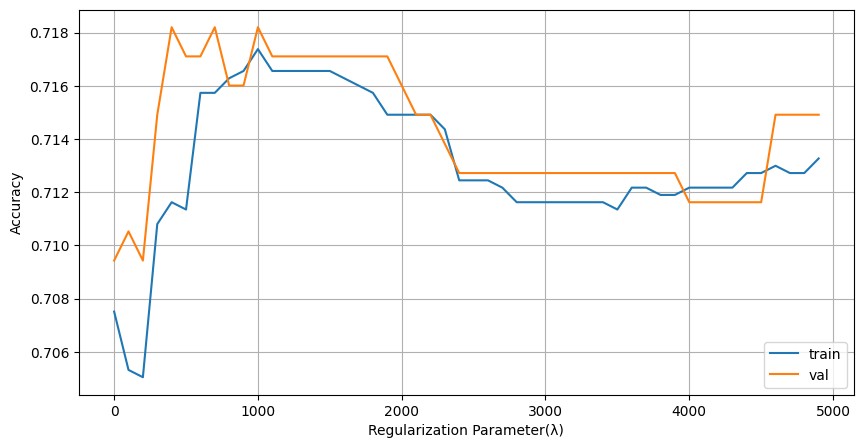

In [132]:
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.01, 5000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 5000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

la = 1000 is a value where both training and validation accuracy scores seems to be closer<br>

Therefore, training the model for la = 1000

In [133]:
latest_model = LogisticRegression(C=1/1000)

In [134]:
latest_model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.001)

In [135]:
Accuracy(y_train, latest_model.predict(X_train_scaled))

0.7173793859649122

In [136]:
Accuracy(y_val, latest_model.predict(X_val_scaled))

0.7182017543859649

In [137]:
Accuracy(y_test, latest_model.predict(X_test_scaled))

0.706140350877193